## Insights and Recommendations
## Overview
This notebook identifies drivers and pain points per bank, compares banks on sentiment and ratings, and suggests improvements based on user reviews.

In [14]:

from pathlib import Path
import os
import pandas as pd

import re  # <-- Add this import
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns


# Resolve dynamic paths
cwd = Path.cwd()
project_root = cwd.parent if cwd.name == 'notebooks' else next((p for p in cwd.parents if (p / 'src').exists()), cwd)
csv_path = project_root / 'data' / 'processed' / 'reviews_with_sentiment.csv'
output_dir = project_root / 'outputs' / 'insights'
output_dir.mkdir(parents=True, exist_ok=True)

print(f"Resolved CSV path: {csv_path}")
print(f"Output directory: {output_dir}")


df = pd.read_csv(csv_path)
df.head()



Resolved CSV path: c:\Users\Administrator\Desktop\fintech-mobile-banking-reviews\data\processed\reviews_with_sentiment.csv
Output directory: c:\Users\Administrator\Desktop\fintech-mobile-banking-reviews\outputs\insights


,review_id,review_text,rating,review_date,review_year,review_month,bank_code,bank_name,user_name,thumbs_up,text_length,source,sentiment_label,sentiment_score
0,8880ada3-839f-404f-8bfa-8f96e3755156,good,5,2025-11-16,2025,11,Amharabank,Amharabank,Biruk kassie Dagne,0,4,Google Play,POSITIVE,0.999816
1,32a5a7f5-d6a8-4db6-8c7f-cb49ed0fa052,አስደናቂ ነው ቀላለ ምቹ ፈጣን እና አካታች ነው። ከዚህ በበለጠ ብዙ ነገ...,5,2025-11-16,2025,11,Amharabank,Amharabank,Abebaw Abebe,0,115,Google Play,POSITIVE,0.960320
2,9446a45e-228e-47b3-91e3-f155a222fd3f,Good,5,2025-10-29,2025,10,Amharabank,Amharabank,GIRMA ASSEFA,0,4,Google Play,POSITIVE,0.999816
3,330300c0-9cbb-4546-a865-73bd9fc6784c,good,5,2025-10-15,2025,10,Amharabank,Amharabank,Nebyu Solomon Mebratu,0,4,Google Play,POSITIVE,0.999816
4,5e093ca7-c263-4828-a8dc-d5dfd490fda8,Very Useful and attractive app !,5,2025-10-10,2025,10,Amharabank,Amharabank,Shalom Engineering Dire Dawa,0,32,Google Play,POSITIVE,0.999845


## Keyword Extraction

In [12]:
def extract_keywords(text):
    words = re.findall(r'\b[a-zA-Z]{3,}\b', text.lower())
    stopwords = set(['the','and','for','with','this','that','was','are','you','but','not','have','had','has','app','bank'])
    return [w for w in words if w not in stopwords]


## Identify Drivers and Pain Points

In [10]:

def extract_keywords(text):
    words = re.findall(r'\b[a-zA-Z]{3,}\b', text.lower())
    stopwords = set(['the','and','for','with','this','that','was','are','you','but','not','have','had','has','app','bank'])
    return [w for w in words if w not in stopwords]

summary = {}
for bank, group in df.groupby('bank_name'):
    combined_text = ' '.join(group['review_text'].dropna())
    keywords = extract_keywords(combined_text)
    freq = Counter(keywords)
    summary[bank] = freq.most_common(10)

summary


{'Amharabank': [('good', 35),
  ('very', 30),
  ('best', 25),
  ('nice', 21),
  ('update', 15),
  ('mobile', 14),
  ('banking', 13),
  ('easy', 12),
  ('use', 12),
  ('developer', 12)],
 'Awash Bank': [('good', 98),
  ('best', 47),
  ('very', 29),
  ('use', 22),
  ('fast', 21),
  ('nice', 18),
  ('awash', 17),
  ('excellent', 16),
  ('device', 15),
  ('update', 15)],
 'Commercial Bank of Ethiopia': [('good', 87),
  ('very', 35),
  ('best', 28),
  ('cbe', 27),
  ('nice', 24),
  ('can', 20),
  ('like', 17),
  ('update', 17),
  ('application', 16),
  ('all', 16)]}

## Compare Banks (Visualizations)

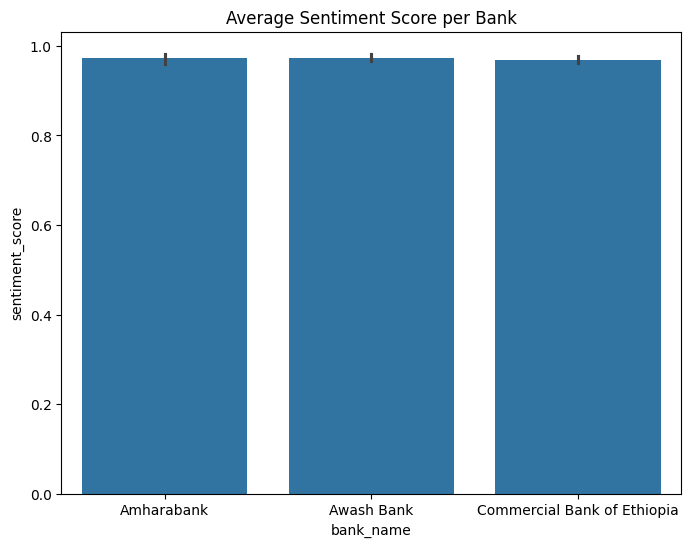

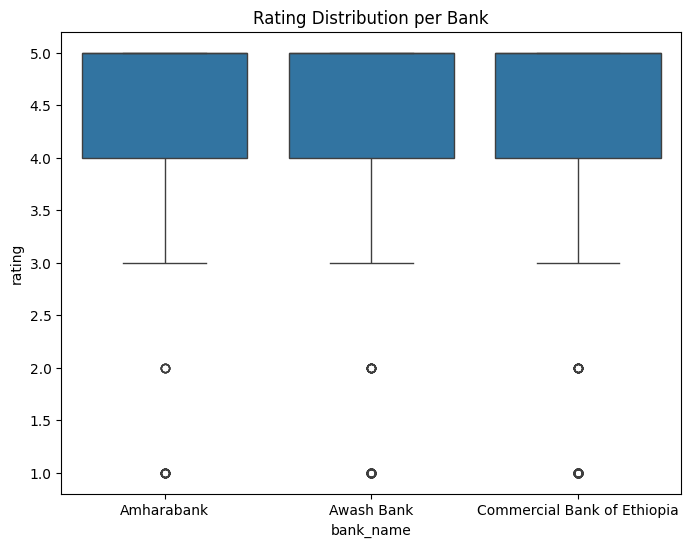

In [ ]:
# Average sentiment per bank
plt.figure(figsize=(8,6))
sns.barplot(x='bank_name', y='sentiment_score', data=df, estimator='mean')
plt.title('Average Sentiment Score per Bank')
plt.show()

# Rating distribution per bank
plt.figure(figsize=(8,6))
sns.boxplot(x='bank_name', y='rating', data=df)
plt.title('Rating Distribution per Bank')
plt.show()


## Suggest Improvements

In [ ]:

insights = {}
for bank, keywords in summary.items():
    drivers = [kw for kw, _ in keywords[:5]]
    pain_points = [kw for kw, _ in keywords[-5:]]
    improvements = [f"Improve {pp}" for pp in pain_points[:2]]
    insights[bank] = {'drivers': drivers, 'pain_points': pain_points, 'improvements': improvements}

pd.DataFrame.from_dict(insights, orient='index')


output_dir.mkdir(parents=True, exist_ok=True)
insights_df = pd.DataFrame.from_dict(insights, orient='index')
insights_df.to_csv(output_dir / 'bank_insights.csv')
print(f"✅ Insights saved to {output_dir / 'bank_insights.csv'}")





✅ Insights saved to c:\Users\Administrator\Desktop\fintech-mobile-banking-reviews\outputs\insights\bank_insights.csv
✅ Insights saved to c:\Users\Administrator\Desktop\fintech-mobile-banking-reviews\outputs\insights\bank_insights.csv
